In [10]:
import pandas as pd
import numpy as np
import onnxruntime as rt
import onnx
import torch
import os
from PIL import Image, ImageDraw, ImageFont
from onnxruntime.quantization import quantize_qat, QuantType, quantize_dynamic
import demo_onnx

In [2]:
model_fp32 = 'best.onnx'
model_quant = 'best_quant.onnx'
model_quant2 = 'best_quant2.onnx'

In [26]:
quantized_model = quantize_qat(model_fp32, model_quant)

In [27]:
quantized_model2 = quantize_dynamic(model_fp32, model_quant2, weight_type=QuantType.QUInt8)

In [10]:
def letterbox_image(image, size):
    iw, ih = image.size
    w, h = size
    scale = min(w / iw, h / ih)
    nw = int(iw * scale)
    nh = int(ih * scale)

    image = image.resize((nw, nh), Image.BICUBIC)
    new_image = Image.new('RGB', size, (128, 128, 128))
    new_image.paste(image, ((w - nw) // 2, (h - nh) // 2))
    return new_image

In [5]:
image_src = Image.open(r"C:\Users\oskar\Desktop\ee290\data_training\images\val\boat1\000009.jpg")
image_src.show()

In [11]:
def detect_onnx2(official=True, image_path=None, model='./best.onnx'):
    num_classes = 96
    anchors = [[116, 90, 156, 198, 373, 326], [30, 61, 62, 45, 59, 119], [10, 13, 16, 30, 33, 23]]  # 5s

    session = rt.InferenceSession(model)
    # print("The model expects input shape: ", session.get_inputs()[0].shape)
    batch_size = session.get_inputs()[0].shape[0]
    img_size_h = session.get_inputs()[0].shape[2]
    img_size_w = session.get_inputs()[0].shape[3]

    # input
    image_src = Image.open(image_path)
    resized = letterbox_image(image_src, (img_size_w, img_size_h))

    img_in = np.transpose(resized, (2, 0, 1)).astype(np.float32)  # HWC -> CHW
    img_in = np.expand_dims(img_in, axis=0)
    #img_in /= 255.0
    # print("Shape of the image input shape: ", img_in.shape)
    print(img_in)
    # inference
    input_name = session.get_inputs()[0].name
    outputs = session.run(None, {input_name: img_in})
    return outputs

In [12]:
test = detect_onnx2(True, path,'./best_quant.onnx')
print(test)

[[[[        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]
   ...
   [        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]]

  [[        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]
   ...
   [        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]
   [        128         128         128 ...         128         128         128]]

  [[      

          [   -0.54794,    -0.51956,      -1.245, ...,     -5.3918,     -5.3594,     -4.2716]]]]], dtype=float32)]


In [3]:
path = r"C:\Users\oskar\Desktop\ee290\data_training\images\val\building2/000028.jpg"

In [17]:
model=onnx.load(model_quant)
print(onnx.helper.printable_graph(model.graph))

graph torch-jit-export (
  %images[FLOAT, 1x3x640x640]
) initializers (
  %438[FLOAT, 4]
  %439[FLOAT, 4]
  %165[INT64, 1]
  %294[FLOAT, 0]
  %319[FLOAT, 0]
  %415[INT64, 5]
  %435[INT64, 5]
  %395[INT64, 5]
  %model.0.conv.conv.bias[FLOAT, 32]
  %model.1.conv.bias[FLOAT, 64]
  %model.10.conv.bias[FLOAT, 256]
  %model.13.cv1.conv.bias[FLOAT, 128]
  %model.13.cv2.conv.bias[FLOAT, 128]
  %model.13.cv3.conv.bias[FLOAT, 256]
  %model.13.m.0.cv1.conv.bias[FLOAT, 128]
  %model.13.m.0.cv2.conv.bias[FLOAT, 128]
  %model.14.conv.bias[FLOAT, 128]
  %model.17.cv1.conv.bias[FLOAT, 64]
  %model.17.cv2.conv.bias[FLOAT, 64]
  %model.17.cv3.conv.bias[FLOAT, 128]
  %model.17.m.0.cv1.conv.bias[FLOAT, 64]
  %model.17.m.0.cv2.conv.bias[FLOAT, 64]
  %model.18.conv.bias[FLOAT, 128]
  %model.2.cv1.conv.bias[FLOAT, 32]
  %model.2.cv2.conv.bias[FLOAT, 32]
  %model.2.cv3.conv.bias[FLOAT, 64]
  %model.2.m.0.cv1.conv.bias[FLOAT, 32]
  %model.2.m.0.cv2.conv.bias[FLOAT, 32]
  %model.20.cv1.conv.bias[FLOAT, 128]
  %

}


In [18]:
test = demo_onnx.detect_onnx(True, path)
print(test)

[tensor([[424.97415, 329.00311, 463.25717, 349.14813,   0.66542,   0.95823,   9.00000]])]


[        425         189         463         209] 0.6654164 building2


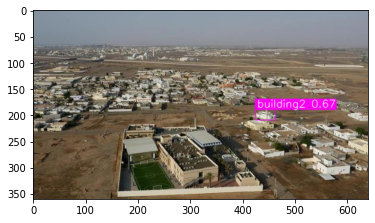

In [5]:
demo_onnx.display(test[0], path)

In [6]:
test = demo_onnx.detect_onnx(True, path, './best_quant.onnx')
print(test)

[tensor([[424.69730, 329.35803, 463.22470, 349.10913,   0.65988,   0.95909,   9.00000]])]


[        425         189         463         209] 0.65988034 building2


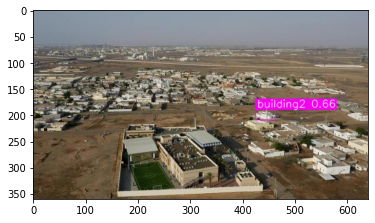

In [7]:
demo_onnx.display(test[0], path)

In [8]:
test = demo_onnx.detect_onnx(True, path, './best_quant2.onnx')
print(test)

[tensor([[424.69730, 329.35803, 463.22470, 349.10913,   0.65988,   0.95909,   9.00000]])]


[        425         189         463         209] 0.65988034 building2


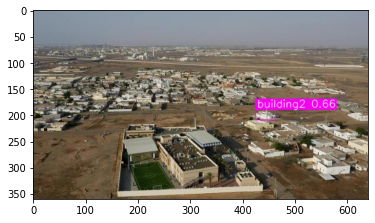

In [9]:
demo_onnx.display(test[0], path)

In [2]:
path="\\train\\boat1\\000001"

In [59]:
def iou_score(path, model="./best_640.onnx"):
    path1= r"C:\Users\oskar\Desktop\ee290\project\data_training\labels"+path+".txt"
    path2= r"C:\Users\oskar\Desktop\ee290\data_training\images\val"+path+".jpg"
    test = demo_onnx.detect_onnx(True, path2, model)
    try:
        box1 = test[0][..., :4].clone()
        with open(path1) as f:
            array = [[float(x) for x in line.split()] for line in f]
        box2 = array[0][1:5]
        demo_onnx.scale_coords((640, 640), box1[:, :], (360, 640))
        box2[0]=box2[0]*640
        box2[1]=box2[1]*360
        box2[2]=box2[2]*640
        box2[3]=box2[3]*360
        box2=torch.tensor([box2])
        box2=demo_onnx.xywh2xyxy(box2)
        return demo_onnx.w_bbox_iou(box1, box2)
    except:
        print(path)
        return([0])

In [60]:
print(os.listdir(path='../data_training/images/val'))

['boat1', 'boat2', 'boat3', 'boat4', 'boat5', 'boat6', 'boat7', 'boat8', 'building1', 'building2', 'building3', 'car1', 'car10', 'car11', 'car12', 'car13', 'car14', 'car15', 'car16', 'car17', 'car18', 'car19', 'car2', 'car20', 'car21', 'car22', 'car23', 'car24', 'car3', 'car4', 'car5', 'car6', 'car8', 'car9', 'drone1', 'drone2', 'drone3', 'drone4', 'group2', 'group3', 'horseride1', 'paraglider1', 'person1', 'person10', 'person11', 'person12', 'person13', 'person14', 'person15', 'person16', 'person17', 'person18', 'person19', 'person2', 'person20', 'person21', 'person22', 'person23', 'person24', 'person25', 'person26', 'person27', 'person28', 'person29', 'person3', 'person4', 'person5', 'person6', 'person7', 'person8', 'person9', 'riding1', 'riding10', 'riding11', 'riding12', 'riding13', 'riding14', 'riding15', 'riding16', 'riding17', 'riding2', 'riding3', 'riding4', 'riding5', 'riding6', 'riding7', 'riding8', 'riding9', 'truck1', 'truck2', 'wakeboard1', 'wakeboard2', 'wakeboard3', 'wak

In [61]:
def accuraccy(model="./best_640.onnx"):
    size_out = len(os.listdir(path='../data_training/images/val'))
    total_out = 0
    for name in os.listdir(path='../data_training/images/val'):
        print(name)
        size = len(os.listdir(path='../data_training/images/val/'+name))
        total = 0
        for i in os.listdir(path='../data_training/images/val/'+name):
            path="\\"+name+"\\"+i[:-4]
            total += iou_score(path, model)[0]
        total_out += total/size
    return total_out/size_out

In [57]:
accuraccy()

boat1
boat2
boat3
boat4
boat5
boat6
boat7
boat8
building1
building2
building3
car1
car10
[None]
car11
car12
car13
car14
[None]
car15
car16
car17
car18
car19
car2
car20
car21
car22
car23
car24
car3
car4
[None]
car5
car6
car8
car9
drone1
[None]
[None]
[None]
[None]
[None]
drone2
drone3
drone4
group2
[None]
group3
[None]
[None]
[None]
horseride1
paraglider1
person1
[None]
person10
person11
person12
person13
person14
person15
person16
person17
person18
person19
person2
person20
person21
person22
person23
person24
person25
person26
person27
person28
person29
person3
person4
person5
person6
person7
person8
person9
riding1
riding10
riding11
riding12
riding13
riding14
riding15
riding16
riding17
riding2
riding3
riding4
riding5
riding6
riding7
riding8
riding9
truck1
truck2
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[N

tensor(0.89188)

In [62]:
accuraccy('./best_quant2.onnx')

boat1
boat2
boat3
boat4
boat5
boat6
boat7
boat8
building1
building2
building3
car1
car10
\car10\1532
car11
car12
car13
car14
\car14\000898
car15
car16
car17
car18
car19
car2
car20
car21
car22
car23
car24
car3
car4
\car4\000399
car5
car6
car8
car9
drone1
\drone1\0238
\drone1\0241
\drone1\0301
\drone1\0302
drone2
drone3
drone4
group2
\group2\001414
group3
\group3\000907
\group3\002243
\group3\002267
horseride1
paraglider1
person1
\person1\000924
person10
person11
person12
person13
person14
person15
person16
person17
\person17\000571
person18
person19
person2
person20
person21
person22
person23
person24
person25
person26
person27
person28
person29
person3
person4
person5
person6
person7
person8
person9
riding1
riding10
riding11
riding12
riding13
riding14
riding15
riding16
riding17
riding2
riding3
riding4
riding5
riding6
riding7
riding8
riding9
truck1
truck2
\truck2\000001
\truck2\000008
\truck2\000014
\truck2\000017
\truck2\000022
\truck2\000029
\truck2\000039
\truck2\000041
\truck2\00004

tensor(0.88425)